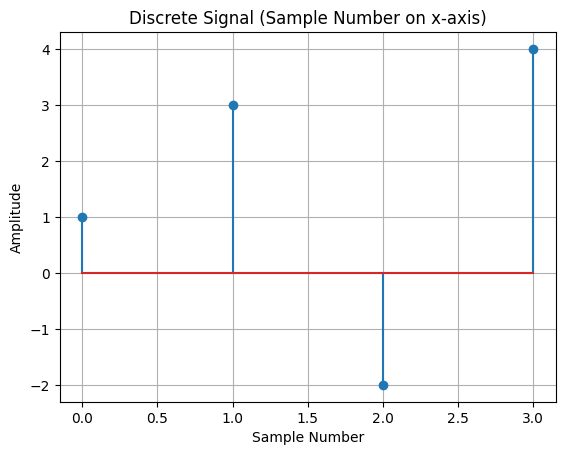

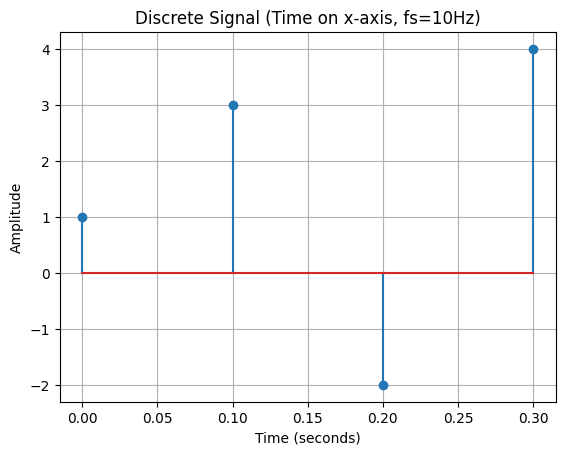

Inner Product of x and y: 30


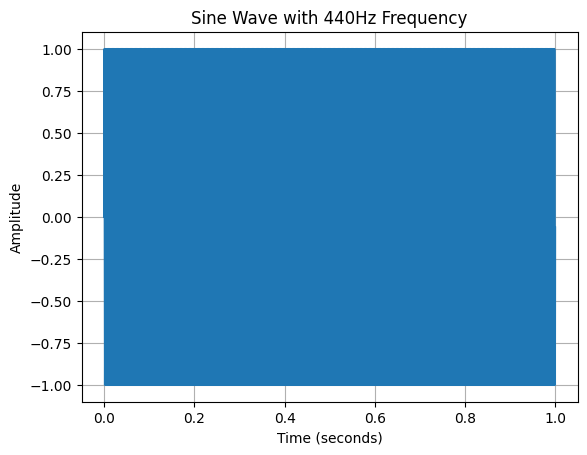

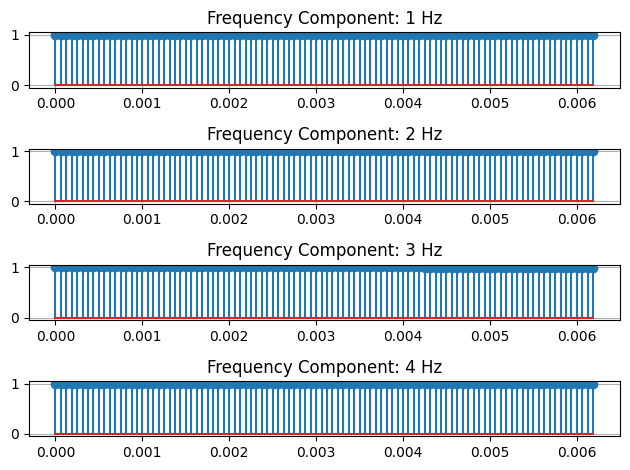

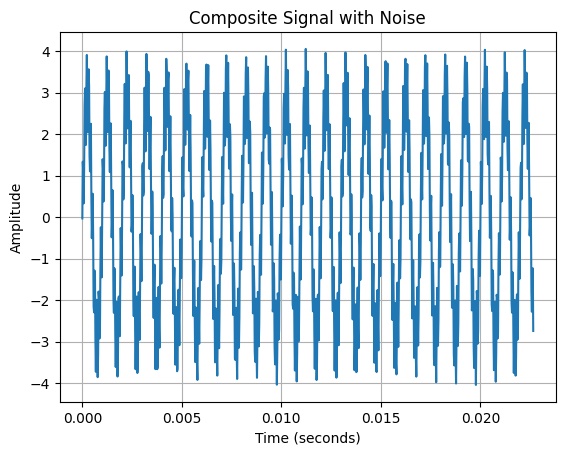

Audio saved as 'composite_signal.wav'


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from IPython.display import Audio

# 1. サンプリング周期のプロット
def plot_discrete_signal():
    x = [1, 3, -2, 4]
    plt.figure()
    plt.stem(x)
    plt.xlabel("Sample Number")
    plt.ylabel("Amplitude")
    plt.title("Discrete Signal (Sample Number on x-axis)")
    plt.grid()
    plt.show()

def plot_signal_with_time(fs=10):
    x = [1, 3, -2, 4]
    t = np.arange(len(x)) / fs
    plt.figure()
    plt.stem(t, x)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title(f"Discrete Signal (Time on x-axis, fs={fs}Hz)")
    plt.grid()
    plt.show()

# 2. ベクトルの内積
def calculate_inner_product(x, y):
    i_prod = np.dot(x, y)
    print(f"Inner Product of x and y: {i_prod}")
    return i_prod

# 3. 正弦波の生成とプロット
def generate_and_plot_sine_wave(fs=44100, f=1, duration=1):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    x = np.sin(2 * np.pi * f * t)
    plt.figure()
    plt.plot(t, x)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title(f"Sine Wave with {f}Hz Frequency")
    plt.grid()
    plt.show()
    return x, fs

# 4. 複数の周波数による信号合成
def composite_signal(frequencies, fs=16000, duration=1):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = sum([np.cos(2 * np.pi * f * t) + np.sin(2 * np.pi * f * t) for f in frequencies])
    plt.figure()
    for i, f in enumerate(frequencies):
        plt.subplot(len(frequencies), 1, i+1)
        plt.stem(t[:100], np.cos(2 * np.pi * f * t)[:100])  # Cosine components
        plt.grid()
        plt.title(f"Frequency Component: {f} Hz")
    plt.tight_layout()
    plt.show()
    return signal, fs

# 5. 音データの生成と保存
def generate_sound_data(fs=44100, A1=3, A2=1, f1=1000, f2=10000, duration=3):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    x1 = A1 * np.sin(2 * np.pi * f1 * t)
    x2 = A2 * np.sin(2 * np.pi * f2 * t)
    noise = np.random.rand(len(t)) - 0.5
    x = x1 + x2 + 0.2 * noise
    plt.figure()
    plt.plot(t[:1000], x[:1000])  # Plot a portion for clarity
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Composite Signal with Noise")
    plt.grid()
    plt.show()
    write("composite_signal.wav", fs, (x * 32767).astype(np.int16))
    print("Audio saved as 'composite_signal.wav'")
    return x, fs

# 実行例
# (1) 離散信号と時間軸に対するプロット
plot_discrete_signal()
plot_signal_with_time(fs=10)

# (2) ベクトル内積
x = [1, 3, -2, 4]
y = [1, 3, -2, 4]
calculate_inner_product(x, y)

# (3) 正弦波の生成と再生
sine_wave, fs = generate_and_plot_sine_wave(fs=44100, f=440, duration=1)
Audio(sine_wave, rate=fs)

# (4) 複数の周波数による信号合成
frequencies = [1, 2, 3, 4]
composite_signal, fs = composite_signal(frequencies, fs=16000, duration=1)
Audio(composite_signal, rate=fs)

# (5) 音データの生成と保存
sound_data, fs = generate_sound_data(fs=44100, A1=3, A2=1, f1=1000, f2=10000, duration=3)
Audio(sound_data, rate=fs)
